<a href="https://colab.research.google.com/github/Tush31ar/Zomato-EDA/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING PACKAGES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

## IMPORTING DATASET

In [ ]:
df=pd.read_csv('/content/zomato.csv',on_bad_lines='skip', engine="python")

## ANALYSING DATASET

In [ ]:
df.info()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51155 entries, 0 to 51154
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51155 non-null  object
 1   address                      51155 non-null  object
 2   name                         51155 non-null  object
 3   online_order                 51155 non-null  object
 4   book_table                   51155 non-null  object
 5   rate                         43380 non-null  object
 6   votes                        51155 non-null  int64 
 7   phone                        49952 non-null  object
 8   location                     51134 non-null  object
 9   rest_type                    50931 non-null  object
 10  dish_liked                   23081 non-null  object
 11  cuisines                     51110 non-null  object
 12  approx_cost(for two people)  50811 non-null  object
 13  reviews_list                 51

(51155, 17)

## FIND DUPLICATES AND ELIMINATE

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## FIXING RATE COLUMN

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '2.4 /5', '4.7 /5',
       '2.2 /5', '2.0 /5', '2.1 /5', '1.8 /5'], dtype=object)

In [ ]:
def handle_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [ ]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].isnull().sum()

0

## DROPPING UNNECESSARY COLUMNS

In [ ]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)

In [ ]:
df = df.dropna()

## RENAMING COLUMNS FOR BETTER UNDERSTANDING

In [ ]:
df = df.rename(columns = {'approx_cost(for two people)':'cost2people', 'listed_in(type)':'type'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50591 entries, 0 to 51154
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             50591 non-null  object 
 1   online_order     50591 non-null  object 
 2   book_table       50591 non-null  object 
 3   rate             50591 non-null  float64
 4   votes            50591 non-null  int64  
 5   location         50591 non-null  object 
 6   rest_type        50591 non-null  object 
 7   cuisines         50591 non-null  object 
 8   cost2people      50591 non-null  object 
 9   type             50591 non-null  object 
 10  listed_in(city)  50591 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


## CLUBBING RESTAURANT TYPES TO "OTHERS" WHICH ARE LESS THAN 1000

In [ ]:
df['rest_type'].value_counts(ascending = False)

,count
rest_type,
Quick Bites,19015
Casual Dining,10154
Cafe,3626
Delivery,2567
Dessert Parlor,2235
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


In [ ]:
rest_type_lessthan1000 = df['rest_type'].value_counts(ascending = False)[df['rest_type'].value_counts() < 1000]
rest_type_lessthan1000

,count
rest_type,
Beverage Shop,865
Bar,668
Food Court,619
Sweet Shop,468
"Bar, Casual Dining",391
...,...
"Dessert Parlor, Kiosk",2
"Food Court, Beverage Shop",2
"Dessert Parlor, Food Court",2


In [ ]:
def handle_rest_type(value):
  if(value in rest_type_lessthan1000):
    return 'others'
  else:
    return value

df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19015
Casual Dining,10154
others,8761
Cafe,3626
Delivery,2567
Dessert Parlor,2235
"Takeaway, Delivery",2011
Bakery,1140
"Casual Dining, Bar",1082


## CLUBBING CUISINES TO "OTHERS"

In [ ]:
df['cuisines'].value_counts(ascending = False)

,count
cuisines,
North Indian,2835
"North Indian, Chinese",2341
South Indian,1819
Biryani,905
"Bakery, Desserts",898
...,...
"Healthy Food, Asian, Continental",1
"Fast Food, Chinese, Burger, Hot dogs",1
"European, Asian, North Indian",1


In [ ]:
df['cuisines'].value_counts().max()

2835

In [ ]:
cuisine_less_than_200 = df['cuisines'].value_counts()[df['cuisines'].value_counts() < 200]
cuisine_less_than_200

,count
cuisines,
"Bakery, Fast Food",199
Continental,194
"North Indian, Mughlai",186
"South Indian, North Indian, Chinese, Street Food",186
"Fast Food, Rolls",172
...,...
"Healthy Food, Asian, Continental",1
"Fast Food, Chinese, Burger, Hot dogs",1
"European, Asian, North Indian",1


In [ ]:
def handle_cuisines(value):
  if(value in cuisine_less_than_200):
    return 'others'
  else:
    return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

,count
cuisines,
others,30370
North Indian,2835
"North Indian, Chinese",2341
South Indian,1819
Biryani,905
"Bakery, Desserts",898
Fast Food,798
Desserts,758
Cafe,726


In [ ]:
df.drop('listed_in(city)', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50591 entries, 0 to 51154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          50591 non-null  object 
 1   online_order  50591 non-null  object 
 2   book_table    50591 non-null  object 
 3   rate          50591 non-null  float64
 4   votes         50591 non-null  int64  
 5   location      50591 non-null  object 
 6   rest_type     50591 non-null  object 
 7   cuisines      50591 non-null  object 
 8   cost2people   50591 non-null  object 
 9   type          50591 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.2+ MB


## FIXING LOCATION COLUMN

In [ ]:
df['location'].value_counts(ascending = False)

,count
location,
BTM,5062
HSR,2480
Koramangala 5th Block,2384
JP Nagar,2209
Whitefield,2092
...,...
West Bangalore,6
Yelahanka,5
Jakkur,3


In [ ]:
location_less_than_300 = df['location'].value_counts()[df['location'].value_counts() < 300]
location_less_than_300

,count
location,
Koramangala 8th Block,294
Vasanth Nagar,293
Jeevan Bhima Nagar,268
Wilson Garden,246
Bommanahalli,236
Koramangala 3rd Block,215
Kumaraswamy Layout,191
Thippasandra,191
Nagawara,187


In [ ]:
def handle_location(value):
  if(value in location_less_than_300):
    return 'others'
  else:
    return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

,count
location,
BTM,5062
others,4954
HSR,2480
Koramangala 5th Block,2384
JP Nagar,2209
Whitefield,2092
Indiranagar,1990
Jayanagar,1909
Marathahalli,1780


In [ ]:
df['type'].value_counts()

,count
type,
Delivery,25484
Dine-out,17372
Desserts,3529
Cafes,1670
Drinks & nightlife,1020
Buffet,846
Pubs and bars,670


## COUNT PLOTS OF VARIOUS LOCATIONS

<ipython-input-31-a434f8100f71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['location'], palette = 'plasma')


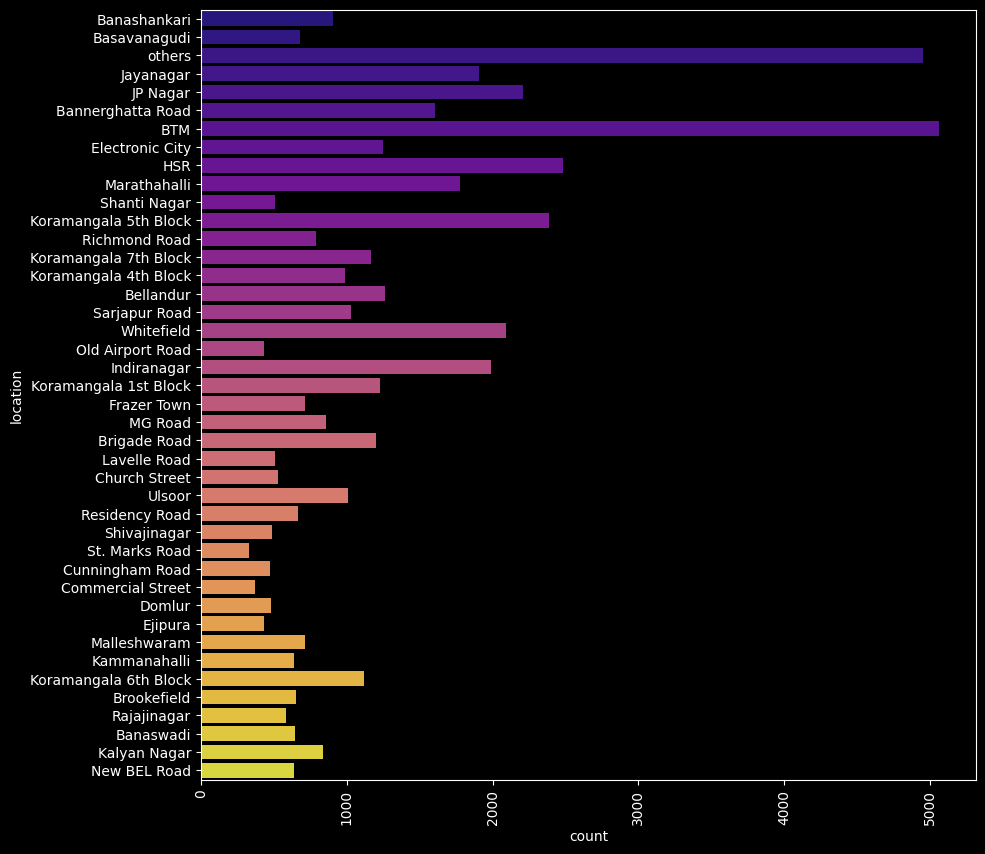

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.countplot(df['location'], palette = 'plasma')
plt.xticks(rotation = 90)
plt.show()

## VISUALISING ONLINE ORDER

<ipython-input-34-29305a549aec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['online_order'], palette = 'plasma')


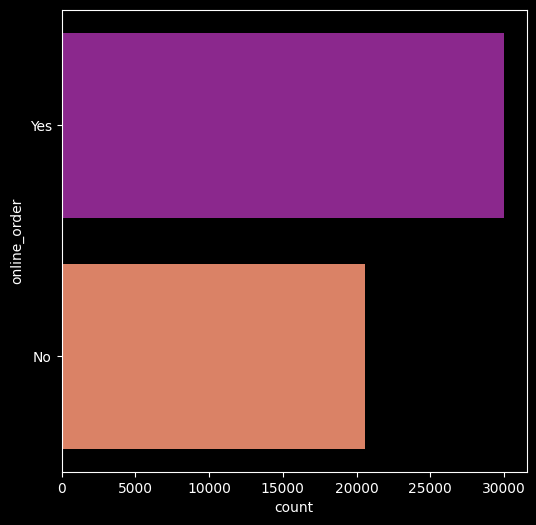

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.countplot(df['online_order'], palette = 'plasma')
plt.show()

## VISUALISING BOOKINGS

<ipython-input-36-48b7b08db13b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['book_table'], palette = 'plasma')


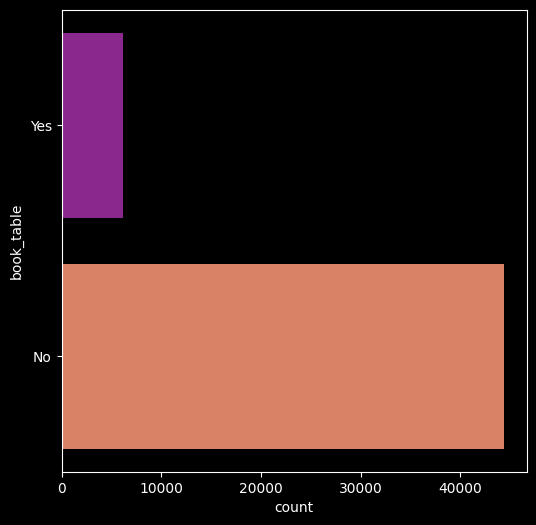

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.countplot(df['book_table'], palette = 'plasma')
plt.show()

## VISUALISING ONLINE ORDER VS RATINGS

<ipython-input-37-b0f7f05e76aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = "online_order", y = "rate", data = df,  palette = 'plasma')


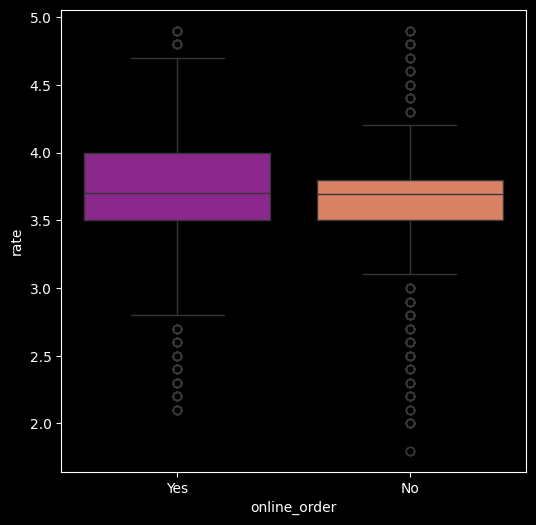

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(x = "online_order", y = "rate", data = df,  palette = 'plasma')
plt.show()

## VISUALISING BOOKINGS VS RATINGS

<ipython-input-38-f59b0ba1d537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = "book_table", y = "rate", data = df,  palette = 'plasma')


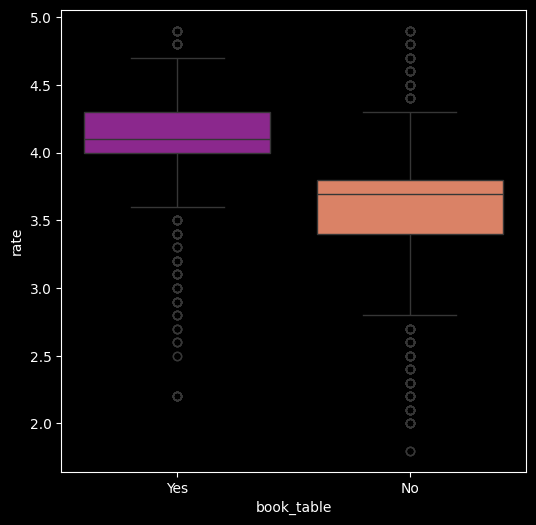

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(x = "book_table", y = "rate", data = df,  palette = 'plasma')
plt.show()

## VISUALISING TYPE OF RESTAURANTS VS RATINGS

<ipython-input-41-9c888abde2ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = "type", y = "rate", data = df,  palette = 'plasma')


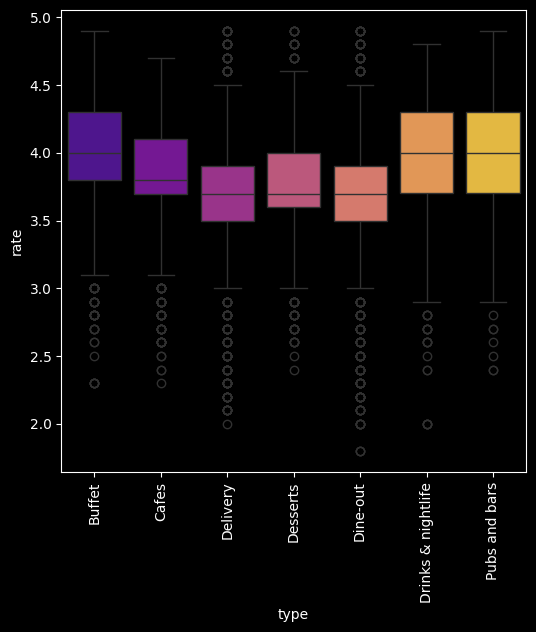

In [ ]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(x = "type", y = "rate", data = df,  palette = 'plasma')
plt.xticks(rotation = 90)
plt.show()

## GROUPING TYPES OF RESTAURANTS LOCATION WISE

In [ ]:
df1 = df.groupby(['location','type'])['name'].count()
df1.to_csv('location_type.csv')
df2 = pd.read_csv('location_type.csv')
df2 = pd.pivot_table(df2, index = 'location', columns = 'type', fill_value = 0, aggfunc = np.sum)
df2

<ipython-input-44-cbe7714945a4>:4: FutureWarning: The provided callable <function sum at 0x7c44ca3f80d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, index = 'location', columns = 'type', fill_value = 0, aggfunc = np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3060      198     1659   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      313       37      264   
Bannerghatta Road          9    46      824      137      578   
Basavanagudi               7    10      344       66      250   
Bellandur                 28    36      618       75      476   
Brigade Road              25    46      501      107      448   
Brookefield                6    17      338       45      245   
Church Street             16    45      187       28      194   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    31      193       23      180   
Domlur                    15    13      259       35      135   
Ejipura                    0     0      246       16      171   
Electronic City           23    24      571       71      516   
Frazer Town                1    11      471       55      172   
HSR                       17    47     1689      120      575   
Indiranagar               36    94     1070      139      523   
JP Nagar                  44    76     1149      165      718   
Jayanagar                 27    77     1039      182      572   
Kalyan Nagar               9    45      366       88      311   
Kammanahalli               2    27      330       35      239   
Koramangala 1st Block      3    24      709       70      396   
Koramangala 4th Block     21    52      458       75      293   
Koramangala 5th Block     59   143     1052      204      804   
Koramangala 6th Block     18    43      509       68      407   
Koramangala 7th Block     25    52      503      127      414   
Lavelle Road              30    27      124       50      185   
MG Road                   51    70      261       68      327   
Malleshwaram              11    31      272       85      284   
Marathahalli              30    32      972      104      619   
New BEL Road               4    28      334       33      222   
Old Airport Road          10     5      200       35      163   
Rajajinagar               10     4      254       55      249   
Residency Road            20    31      188       62      286   
Richmond Road             61    18      254       78      352   
Sarjapur Road             23    22      553       82      312   
Shanti Nagar               9    22      201       39      227   
Shivajinagar               6    17      140       37      276   
St. Marks Road             5     9      110       10      139   
Ulsoor                    16    55      457       68      357   
Whitefield                28    51     1041      133      763   
others                    84   133     2784      276     1555   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      8             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          51            22  
Brookefield                            4             0  
Church Street                         35            22  
Commercial Street                      0             0  
Cunningham Road                       14             6  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

## ANALYSING TOP CUISINES

In [ ]:
df3 = df[['cuisines', 'votes']]
df3.drop_duplicates()
df4 = df3.groupby(['cuisines'])['votes'].sum()
df4  = df4.to_frame().sort_values('votes', ascending = False)
df4.head()


,votes
cuisines,
others,11137468
North Indian,506478
"North Indian, Chinese",254511
South Indian,153039
Chinese,101736


In [ ]:
df4 = df4.iloc[1:,:]
df4.head()

,votes
cuisines,
North Indian,506478
"North Indian, Chinese",254511
South Indian,153039
Chinese,101736
Cafe,89986
